In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
query = """
SELECT nc.npi,
        organization_name,
        first_name,
        last_name,
        nc.communityid,
        t.grouping,
        t.classification,
        t.specialization,
        entity_type_code
        
FROM npi_community AS nc
INNER JOIN npidata AS nd
USING(npi)
INNER JOIN taxonomy AS t
USING(taxonomy_code);

"""

In [3]:
with sqlite3.connect('./data/hop_db.sqlite') as db: 
    df = pd.read_sql(query, db)

In [18]:
graph_data = (df['communityid']
              .value_counts()
              [:20]
              .rename_axis('Community_ID')
              .reset_index(name='Number_of_NPIs')
)

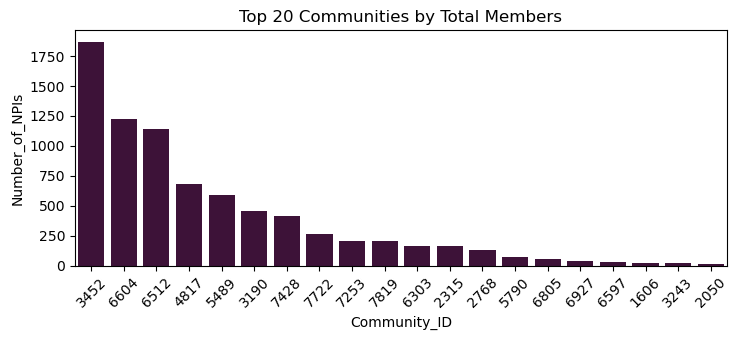

In [29]:
fig_1 = plt.figure()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

sns.barplot(
                data = graph_data,
                x = 'Community_ID',
                y = 'Number_of_NPIs',
                order = graph_data.sort_values('Number_of_NPIs', ascending=False).Community_ID,
                color = '#440B3D'
            )
plt.xticks(rotation=45)
plt.title('Top 20 Communities by Total Members')
plt.show()

There seems to bee only one big community of providers. Group 43 has the largest network by a mile, with 325 providers. The next highest group is 1606 with 9 providers. 

In [26]:
import matplotlib.pyplot as plt
import base64
from io import BytesIO


In [30]:
tmpfile = BytesIO()
fig_1.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = '<img src=\'data:image/png;base64,{}\'>'.format(encoded)

with open('fig1.html','w') as f:
    f.write(html)